In [1]:
from google.colab import files 
files.upload()

Saving Sales_add.csv to Sales_add.csv


{'Sales_add.csv': b'Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)\r\nMonth-1,Region - A,Manager - A,132921,270390\r\nMonth-2,Region - A,Manager - C,149559,223334\r\nMonth-3,Region - B,Manager - A,146278,244243\r\nMonth-4,Region - B,Manager - B,152167,231808\r\nMonth-5,Region - C,Manager - B,159525,258402\r\nMonth-6,Region - A,Manager - B,137163,256948\r\nMonth-7,Region - C,Manager - C,130625,222106\r\nMonth-8,Region - A,Manager - A,131140,230637\r\nMonth-9,Region - B,Manager - C,171259,226261\r\nMonth-10,Region - C,Manager - B,141956,193735\r\nMonth-11,Region - B,Manager - C,159339,203175\r\nMonth-12,Region - A,Manager - A,178939,276279\r\nMonth-13,Region - B,Manager - A,145062,205180\r\nMonth-14,Region - A,Manager - A,151514,253131\r\nMonth-15,Region - C,Manager - A,147463,229336\r\nMonth-16,Region - A,Manager - B,177195,187305\r\nMonth-17,Region - A,Manager - C,140862,234908\r\nMonth-18,Region - C,Manager - B,167996,191517\r\nMonth-19,Region - B,Ma

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Assuming the data is stored in a CSV file named "data.csv"
df = pd.read_csv("Sales_add.csv")


In [4]:
# View the first few rows of the DataFrame
print(df.head())

# Check the summary statistics of the data
print(df.describe())

# Check the data types of the columns
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())


     Month      Region      Manager  Sales_before_digital_add(in $)  \
0  Month-1  Region - A  Manager - A                          132921   
1  Month-2  Region - A  Manager - C                          149559   
2  Month-3  Region - B  Manager - A                          146278   
3  Month-4  Region - B  Manager - B                          152167   
4  Month-5  Region - C  Manager - B                          159525   

   Sales_After_digital_add(in $)  
0                         270390  
1                         223334  
2                         244243  
3                         231808  
4                         258402  
       Sales_before_digital_add(in $)  Sales_After_digital_add(in $)
count                       22.000000                      22.000000
mean                    149239.954545                  231123.727273
std                      14844.042921                   25556.777061
min                     130263.000000                  187305.000000
25%               

In [11]:
# Calculate average sales before and after digital marketing
average_sales_before = df["Sales_before_digital_add(in $)"].mean()
average_sales_after = df["Sales_After_digital_add(in $)"].mean()

# Perform a t-test to compare the means
t_statistic, p_value = stats.ttest_rel(df["Sales_before_digital_add(in $)"], df["Sales_After_digital_add(in $)"])


In [13]:
# Create a contingency table
contingency_table = pd.crosstab(df["Region"], df["Manager"])

# Perform the chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)


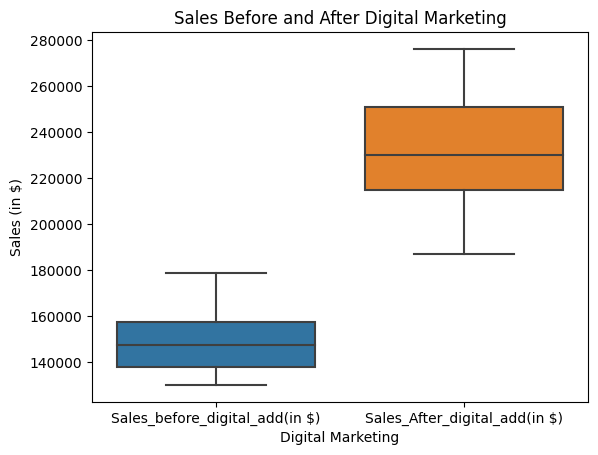

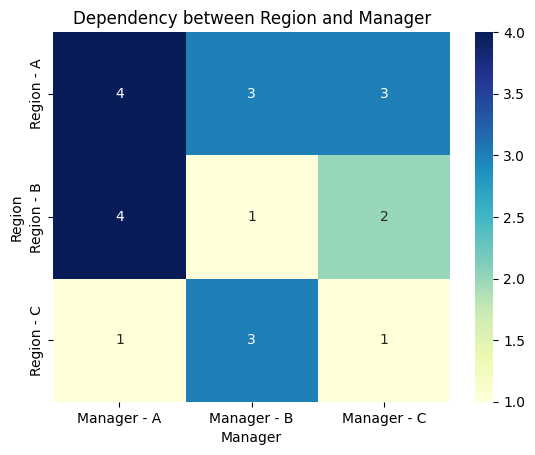

In [14]:
# Visualize the sales data before and after digital marketing
sns.boxplot(data=df[["Sales_before_digital_add(in $)", "Sales_After_digital_add(in $)"]])
plt.xlabel("Digital Marketing")
plt.ylabel("Sales (in $)")
plt.title("Sales Before and After Digital Marketing")
plt.show()

# Visualize the contingency table
sns.heatmap(contingency_table, cmap="YlGnBu", annot=True, fmt="d")
plt.xlabel("Manager")
plt.ylabel("Region")
plt.title("Dependency between Region and Manager")
plt.show()
